In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import datetime

In [85]:
df = pd.read_csv("/Users/all_day/Downloads/product data case.csv")
df.dropna(inplace=True)
df.month = pd.to_datetime(df['month'])
france = df[df['country'] == 'fr']
#italy = df[df['country'] == 'it']
df.drop(columns = ["country", "site"], inplace=True)
france.drop(columns = ["country", "site"], inplace=True) 
#italy.drop(columns = ["country", "site"], inplace=True)

#df.isnull().sum()

mask = france['mktchannel'].value_counts().head(5).index.to_list()
mask.append('month')
france_top_mktchannel = france[france.mktchannel.isin(mask)]

/Users/all_day/opt/anaconda3/envs/jup/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0, 0.5, 'count')

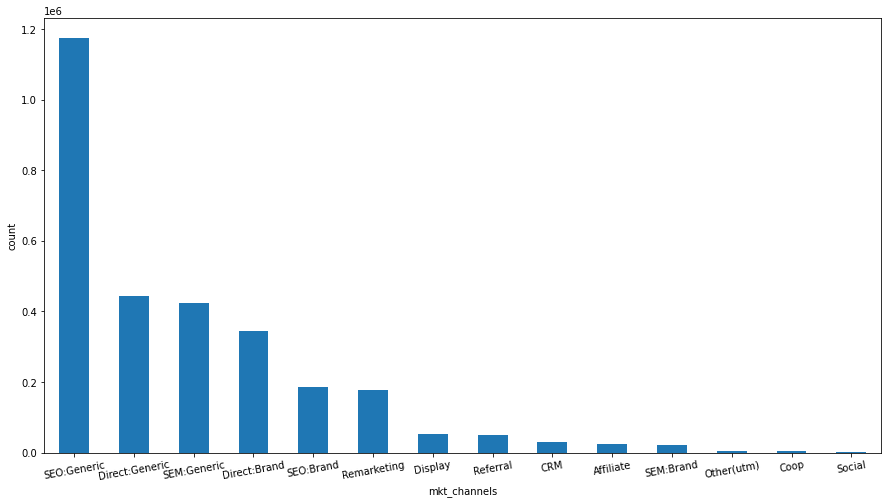

In [234]:
france['mktchannel'].value_counts().plot(kind='bar', figsize=(15,8), rot=10)
plt.xlabel("mkt_channels")
plt.ylabel("count")


<AxesSubplot:xlabel='mktchannel', ylabel='sum_pageimpressions'>

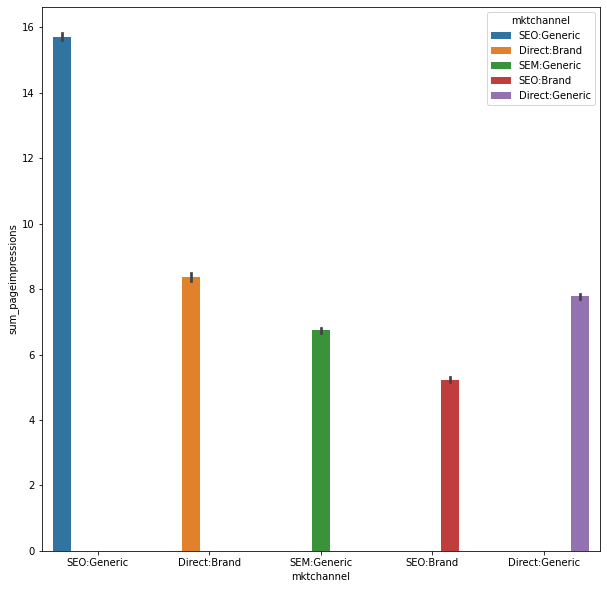

In [7]:
plt.figure(figsize=(10,10))
sns.barplot(x='mktchannel',y='sum_pageimpressions', hue= "mktchannel", data=france_top_mktchannel)

Text(0.5, 1.0, 'Conversion Rates')

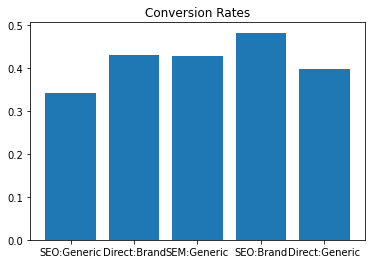

In [251]:
#conversion Rates


sum_leadouts = france_top_mktchannel.groupby(['mktchannel'])['sum_leadouts'].sum()
sum_pageimpressions = france_top_mktchannel.groupby(['mktchannel'])['sum_pageimpressions'].sum()

Direct_Brand = sum_leadouts['Direct:Brand'] / sum_pageimpressions['Direct:Brand']
Direct_Generic = sum_leadouts['Direct:Generic'] / sum_pageimpressions['Direct:Generic']

SEM_Generic = sum_leadouts['SEM:Generic'] / sum_pageimpressions['SEM:Generic']
SEO_Brand = sum_leadouts['SEO:Brand'] / sum_pageimpressions['SEO:Brand']
SEO_Generic = sum_leadouts['SEO:Generic'] / sum_pageimpressions['SEO:Generic']

mktchannel_names = {'SEO:Generic': 0.34066326054269136,
                    'Direct:Brand' : 0.42968036545590177,
                    'SEM:Generic' : 0.42832606777744064,
                    'SEO:Brand' : 0.48186448225128303, 
                    'Direct:Generic':0.3978765427514255}

plt.bar(mktchannel_names.keys(), mktchannel_names.values())
plt.title("Conversion Rates")

<AxesSubplot:xlabel='category_id,product_name'>

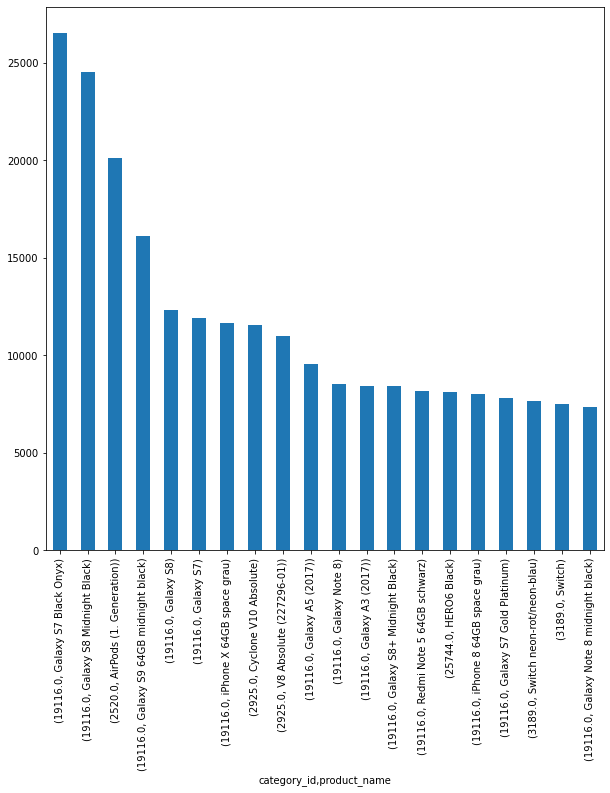

In [252]:
prod_sum_leadout = france_top_mktchannel.groupby(['category_id','product_name'] )["sum_leadouts"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,10))

prod_sum_leadout.iloc[:20].plot(kind='bar')

In [257]:

prod_leadout_price = france_top_mktchannel.groupby(['category_id','product_name'] )["sum_leadout_price"].sum().sort_values(ascending=False)
prod_leadout_price.iloc[:10].plot()

category_id  product_name                                                
19116.00000  Galaxy S8 Midnight Black                                       10334474.00000
             iPhone X 64GB space grau                                        9740828.00000
12313.00000  EOS 5D Mark IV                                                  8884779.00000
             D850                                                            7939510.00000
19116.00000  Galaxy S9 64GB midnight black                                   7876056.00000
                                                                                 ...      
8494.00000   Nostradamus: Die letzte Prophezeihung (PC)                            1.00000
             Mozart: Das letzte Geheimnis (PC)                                     1.00000
5232.00000   BOX65 50er-Pack CD-Papiertaschen mit Lasche und Sichtfenster          1.00000
5414.00000   Pro-Expert Stages Zahnpasta Eisprinzessin (75ml)                      1.00000
5632.00000   96 

Text(0.5, 1.0, 'Sum_leadout_price')

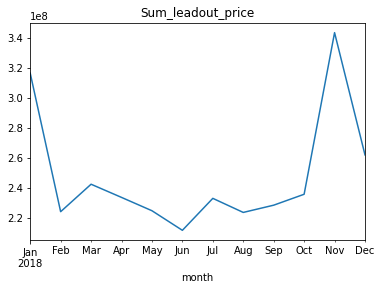

In [258]:
france_top_mktchannel.groupby(["month"]).sum_leadout_price.sum().plot()
plt.title('Sum_leadout_price')

In [ ]:
#A/B Testing

In [ ]:
fraction_total = 8232+9678+9112
a = 8232/ fraction_total
a*75/812

b = 9678/fraction_total
b*89/1211

c = 9112/ fraction_total
c*82/814